# Evaluation
**Bill Xia**<br>
CS 136: Statistical Pattern Recognition<br>
Created: 4/23/24

**Purpose:** A Python notebook that evaluates the baseline and upgrade models for a statistical biomedical term identifier.

In [1]:
# Imports
import json
import random
from baseline import IdentifierBaseline
from upgrade import IdentifierUpgrade
import numpy as np
import matplotlib.pyplot as plt

## Preparing Data & Eval Method

In [2]:
# Loading data.
fp = open('labeledAbstractSentences.json')
data = json.load(fp)
fp.close()

# Shuffling data. Keep unshuffled data for separate experiment.
random.seed(123)
data_list    = list(data.items())
data_unshuff = data_list.copy()
random.shuffle(data_list)

# Splitting data.
data_size = len(data_list)
cutoff_1  = int(data_size*0.85)
cutoff_2  = int((data_size*0.85) + (data_size*0.05))

training   = data_list[         : cutoff_1]
validation = data_list[cutoff_1 : cutoff_2]
# testing    = data_list[cutoff_2 :         ]
testing    = data_list[cutoff_1 :         ]

train_unshuff = data_unshuff[         : cutoff_1]
valid_unshuff = data_unshuff[cutoff_1 : cutoff_2]
# test_unshuff  = data_unshuff[cutoff_2 :         ]
test_unshuff  = data_unshuff[cutoff_1 :         ]

In [3]:
# Function that takes evaluates a model given some data..
def eval_model(model, test_data):
    '''
    Returns TPs, TNs, FPs, FNs
    `test_data`is a list of sentence-label pairs.
    '''

    # Initialize return values.
    tps, tns, fps, fns = 0.0, 0.0, 0.0, 0.0
    unseen_words, total_words = 0.0, 0.0

    for sent, labs in test_data:

        # Collect predictions as well as unseen word data.
        pred_labs, curr_unseen_words, curr_total_words = model.predict(sent)

        # Update unseen_words and total_words.
        unseen_words += curr_unseen_words
        total_words  += curr_total_words

        assert(len(labs) == len(pred_labs))
        for idx, (actual, pred) in enumerate(zip(labs, pred_labs)):
            if model.label_to_int(actual) == pred:
                if pred == 0:
                    tns += 1
                else:
                    tps += 1
            else:
                if pred == 0:
                    fns += 1
                    # print(f'"{sent.lower().strip().split()[idx]}" is in vocab: {sent.lower().strip().split()[idx] in model.vocabulary}')
                    # print(f'In vocab: {sent.lower().strip().split()[idx] in model.vocabulary}')
                else:
                    fps += 1
    return tps, tns, fps, fns, unseen_words / total_words

## Baseline Evaluation
### Training the Baseline

In [4]:
identifier = IdentifierBaseline()
identifier.train(training)

### Testing the Baseline

In [5]:
# Evaluating.
tps, tns, fps, fns, usp = eval_model(identifier, testing)

In [6]:
# Computing metrics.
acc  = (tps+tns) / (tps + tns + fps + fns)  # How often is it correct?
prec = tps / (tps + fps)                    # How often are terms correct?
rec  = tps / (tps + fns)                    # How often does it not miss?
f1   = 2 * (prec * rec) / (prec + rec)

# Printing results.
print(f'Unseen Percentage: {round(usp * 100, 4)}%')
print(f'TPS: {tps}\tAccuracy: {round(acc, 4)}')
print(f'TNS: {tns}\tPrecision: {round(prec, 4)}')
print(f'FPS: {fps}\tRecall: {round(rec, 4)}')
print(f'FNS: {fns}\tF1: {round(f1, 4)}')

Unseen Percentage: 6.1886%
TPS: 274.0	Accuracy: 0.9693
TNS: 24394.0	Precision: 0.6816
FPS: 128.0	Recall: 0.2953
FNS: 654.0	F1: 0.412


### With Unshuffled Data

In [7]:
# Training and evaluating on unshuffled data. This data has a higher proportion
# of unseen words in the validation/testing data than in the shuffled data.
identifier_unshuff = IdentifierBaseline()
identifier_unshuff.train(train_unshuff)
tps_us, tns_us, fps_us, fns_us, usp_us = eval_model(identifier_unshuff, test_unshuff)

In [8]:
# Computing metrics.
acc_us  = (tps_us+tns_us) / (tps_us + tns_us + fps_us + fns_us)
prec_us = tps_us / (tps_us + fps_us)
rec_us  = tps_us / (tps_us + fns_us)
f1_us   = 2 * (prec_us * rec_us) / (prec_us + rec_us)

# Printing results.
print(f'Unseen Percentage: {round(usp_us * 100, 4)}%')
print(f'TPS: {tps_us}\tAccuracy: {round(acc_us, 4)}')
print(f'TNS: {tns_us}\tPrecision: {round(prec_us, 4)}')
print(f'FPS: {fps_us}\tRecall: {round(rec_us, 4)}')
print(f'FNS: {fns_us}\tF1: {round(f1_us, 4)}')

Unseen Percentage: 11.3345%
TPS: 54.0	Accuracy: 0.9752
TNS: 24106.0	Precision: 0.3724
FPS: 91.0	Recall: 0.0936
FNS: 523.0	F1: 0.1496


## Upgrade Evaluation
### Training the Upgrade

In [9]:
identifier_upgrade = IdentifierUpgrade()
identifier_upgrade.train(training)

### Testing the Upgrade

In [10]:
# Evaluating.
tps_u, tns_u, fps_u, fns_u, usp_u = eval_model(identifier_upgrade, testing)

In [11]:
# Computing metrics.
acc_u  = (tps_u+tns_u) / (tps_u + tns_u + fps_u + fns_u)
prec_u = tps_u / (tps_u + fps_u)
rec_u  = tps_u / (tps_u + fns_u)
f1_u   = 2 * (prec_u * rec_u) / (prec_u + rec_u)

# Printing results.
print(f'Unseen Percentage: {round(usp_u * 100, 4)}%')
print(f'TPS: {tps_u}\tAccuracy: {round(acc_u, 4)}')
print(f'TNS: {tns_u}\tPrecision: {round(prec_u, 4)}')
print(f'FPS: {fps_u}\tRecall: {round(rec_u, 4)}')
print(f'FNS: {fns_u}\tF1: {round(f1_u, 4)}')

Unseen Percentage: 6.1886%
TPS: 245.0	Accuracy: 0.9692
TNS: 24421.0	Precision: 0.7081
FPS: 101.0	Recall: 0.264
FNS: 683.0	F1: 0.3846


### With Unshuffled Data

In [12]:
# Training on unshuffled data.
identifier_unshuff = IdentifierUpgrade()
identifier_unshuff.train(train_unshuff)

In [13]:
# Evaluating.
tps_u_us, tns_u_us, fps_u_us, fns_u_us, usp_u_us = eval_model(identifier_unshuff, test_unshuff)

In [14]:
# Computing metrics.
acc_u_us  = (tps_u_us+tns_u_us) / (tps_u_us + tns_u_us + fps_u_us + fns_u_us)
prec_u_us = tps_u_us / (tps_u_us + fps_u_us)
rec_u_us  = tps_u_us / (tps_u_us+ fns_u_us)
f1_u_us   = 2 * (prec_u_us * rec_u_us) / (prec_u_us + rec_u_us)

# Printing results.
print(f'Unseen Percentage: {round(usp_u_us * 100, 4)}%')
print(f'TPS: {tps_u_us}\tAccuracy: {round(acc_u_us, 4)}')
print(f'TNS: {tns_u_us}\tPrecision: {round(prec_u_us, 4)}')
print(f'FPS: {fps_u_us}\tRecall: {round(rec_u_us, 4)}')
print(f'FNS: {fns_u_us}\tF1: {round(f1_u_us, 4)}')

Unseen Percentage: 11.3345%
TPS: 42.0	Accuracy: 0.9754
TNS: 24123.0	Precision: 0.3652
FPS: 73.0	Recall: 0.0727
FNS: 536.0	F1: 0.1212


## Visualizing Results

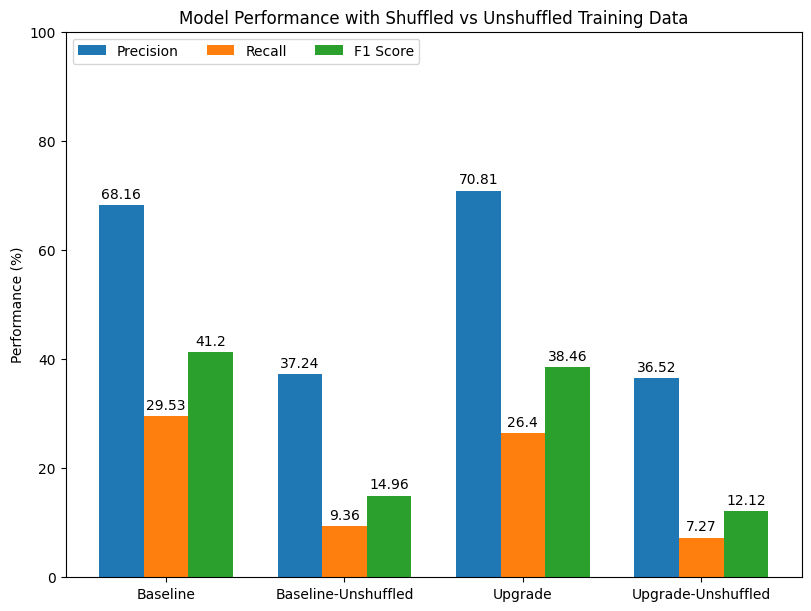

In [15]:
models = ('Baseline', 'Baseline-Unshuffled', 'Upgrade', 'Upgrade-Unshuffled')
scores = {
    'Precision': np.array([round(prec, 4), round(prec_us, 4), round(prec_u, 4), round(prec_u_us, 4)]) * 100,
    'Recall': np.array([round(rec, 4), round(rec_us, 4), round(rec_u, 4), round(rec_u_us, 4)]) * 100,
    'F1 Score': np.array([round(f1, 4), round(f1_us, 4), round(f1_u, 4), round(f1_u_us, 4)]) * 100
}

# metrics = ('Precision', 'Recall', 'F1')
# scores = {
#     'Baseline': [round(prec, 4), round(rec, 4), round(f1, 4)],
#     'Baseline-Unshuffled': [round(prec_us, 4), round(rec_us, 4), round(f1_us, 4)],
#     'Upgrade': [round(prec_u, 4), round(rec_u, 4), round(f1_u, 4)],
#     'Upgrade-Unshuffled': [round(prec_u_us, 4), round(rec_u_us, 4), round(f1_u_us, 4)]
# }

x = np.arange(len(models))
width = 0.25  # the width of the bars
multiplier = 0

fig, ax = plt.subplots(figsize=(8,6), layout='constrained')

for attribute, measurement in scores.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width, label=attribute)
    ax.bar_label(rects, padding=3, fontsize=10)
    multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Performance (%)')
ax.set_title('Model Performance with Shuffled vs Unshuffled Training Data')
ax.set_xticks(x + width, models)
ax.legend(loc='upper left', ncols=4)
ax.set_ylim(0, 100)

plt.show()